In [1]:
import sys
import os
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import rcParams
import pandas as pd
import scanpy as sc
import numpy as np

rcParams['pdf.fonttype'] = 42

In [2]:
from SelectGene import GeneSelector
from spatial_deconv import run_bayestme, run_cell2location, run_tangram, printv

# Predicting cell type deconvolution

Wed Feb  7 04:03:47 2024 Dataset4 rank_genes_group+moranI


/share/anaconda3/envs/scRNApipe/lib/python3.9/site-packages/scvi/_settings.py:63: UserWarning: Since v1.0.0, scvi-tools no longer uses a random seed by default. Run `scvi.settings.seed = 0` to reproduce results from previous versions.
  self.seed = seed
/share/anaconda3/envs/scRNApipe/lib/python3.9/site-packages/scvi/_settings.py:70: UserWarning: Setting `dl_pin_memory_gpu_training` is deprecated in v1.0 and will be removed in v1.1. Please pass in `pin_memory` to the data loaders instead.
  self.dl_pin_memory_gpu_training = (
/share/anaconda3/envs/scRNApipe/lib/python3.9/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/share/

Wed Feb  7 04:05:01 2024 Reading data and perform basic filtering.


/share/anaconda3/envs/scRNApipe/lib/python3.9/site-packages/scanpy/preprocessing/_simple.py:251: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number
No GPU/TPU found, falling back to CPU. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)


Wed Feb  7 04:05:03 2024 Traing regression model


/share/anaconda3/envs/scRNApipe/lib/python3.9/site-packages/scvi/train/_trainrunner.py:76: UserWarning: `use_gpu` is deprecated in v1.0 and will be removed in v1.1. Please use `accelerator` and `devices` instead.
  accelerator, lightning_devices, device = parse_device_args(
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/share/anaconda3/envs/scRNApipe/lib/python3.9/site-packages/lightning/pytorch/trainer/configuration_validator.py:69: You passed in a `val_dataloader` but have no `validation_step`. Skipping val loop.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]
/share/anaconda3/envs/scRNApipe/lib/python3.9/site-packages/lightning/pytorch/loops/fit_loop.py:281: The number of training batches (6) is smaller than the logging interval Trainer(log_every_n_steps=10). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Epoch 300/300: 100%|██████████| 300/300 [02:07<00:00,  2.36it/s, v_num=1, elbo_train=1e+8]   

`Trainer.fit` stopped: `max_epochs=300` reached.


Epoch 300/300: 100%|██████████| 300/300 [02:07<00:00,  2.35it/s, v_num=1, elbo_train=1e+8]


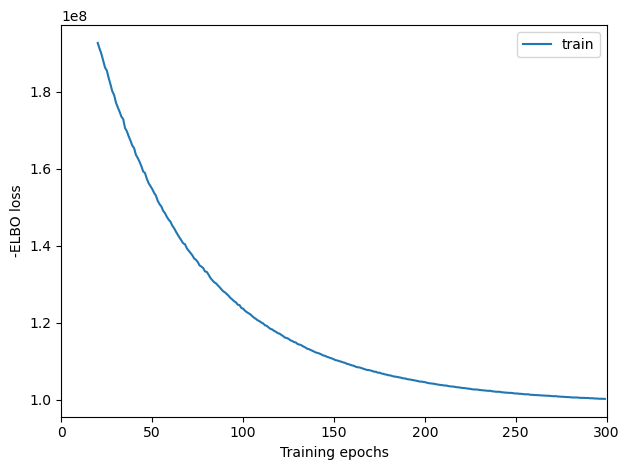

/share/anaconda3/envs/scRNApipe/lib/python3.9/site-packages/scvi/model/base/_pyromixin.py:386: UserWarning: `use_gpu` is deprecated in v1.0 and will be removed in v1.1. Please use `accelerator` and `devices` instead.
  _, _, device = parse_device_args(


Sampling global variables, sample: 100%|██████████| 999/999 [00:08<00:00, 118.30it/s]


/share/anaconda3/envs/scRNApipe/lib/python3.9/site-packages/scvi/train/_trainrunner.py:76: UserWarning: `use_gpu` is deprecated in v1.0 and will be removed in v1.1. Please use `accelerator` and `devices` instead.
  accelerator, lightning_devices, device = parse_device_args(
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/share/anaconda3/envs/scRNApipe/lib/python3.9/site-packages/lightning/pytorch/trainer/configuration_validator.py:69: You passed in a `val_dataloader` but have no `validation_step`. Skipping val loop.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Wed Feb  7 04:07:25 2024 Traing cell2location model


/share/anaconda3/envs/scRNApipe/lib/python3.9/site-packages/lightning/pytorch/loops/fit_loop.py:281: The number of training batches (1) is smaller than the logging interval Trainer(log_every_n_steps=10). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Epoch 4851/5000:  97%|█████████▋| 4851/5000 [10:31<00:19,  7.68it/s, v_num=1, elbo_train=2.87e+5]
Monitored metric elbo_train did not improve in the last 100 records. Best score: 286854.062. Signaling Trainer to stop.


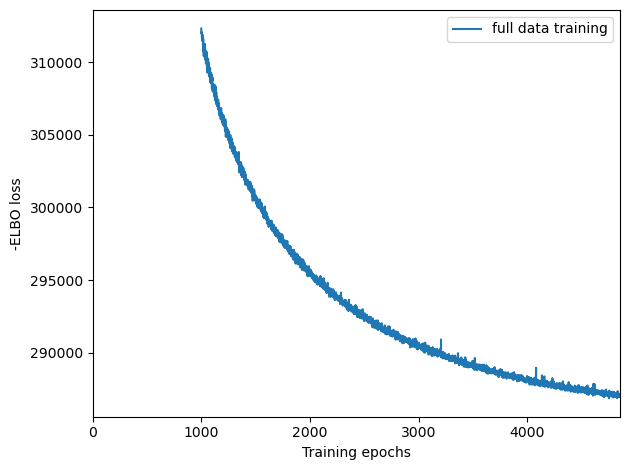

/share/anaconda3/envs/scRNApipe/lib/python3.9/site-packages/scvi/model/base/_pyromixin.py:386: UserWarning: `use_gpu` is deprecated in v1.0 and will be removed in v1.1. Please use `accelerator` and `devices` instead.
  _, _, device = parse_device_args(


AnnData object with n_obs × n_vars = 72 × 1699
    obs: 'cell_count', '_indices', '_scvi_batch', '_scvi_labels'
    uns: 'density', '_scvi_uuid', '_scvi_manager_uuid'
    obsm: 'spatial'
Sampling global variables, sample: 100%|██████████| 999/999 [00:17<00:00, 56.62it/s]
Drop celltype [] contain less 2 sample


INFO:root:1699 training genes are saved in `uns``training_genes` of both single cell and spatial Anndatas.
INFO:root:9684 overlapped genes are saved in `uns``overlap_genes` of both single cell and spatial Anndatas.
INFO:root:uniform based density prior is calculated and saved in `obs``uniform_density` of the spatial Anndata.
INFO:root:rna count based density prior is calculated and saved in `obs``rna_count_based_density` of the spatial Anndata.
INFO:root:Allocate tensors for mapping.
INFO:root:Begin training with 1699 genes and rna_count_based density_prior in clusters mode...
INFO:root:Printing scores every 100 epochs.


Score: 0.669, KL reg: 0.299
Score: 0.906, KL reg: 0.001
Score: 0.907, KL reg: 0.000
Score: 0.907, KL reg: 0.000
Score: 0.907, KL reg: 0.000
Score: 0.907, KL reg: 0.000
Score: 0.907, KL reg: 0.000
Score: 0.907, KL reg: 0.000
Score: 0.907, KL reg: 0.000
Score: 0.907, KL reg: 0.000


INFO:root:Saving results..
INFO:root:spatial prediction dataframe is saved in `obsm` `tangram_ct_pred` of the spatial AnnData.


Wed Feb  7 04:19:19 2024 Dataset4 rank_genes_group+spatialDE


INFO:root:Performing DE test
INFO:root:Pre-calculating USU^T = K's ...
INFO:root:Done: 0.017s
INFO:root:Fitting gene models


Models:   0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

INFO:root:Finished fitting 10 models to 1000 genes


Wed Feb  7 04:20:44 2024 Reading data and perform basic filtering.
Wed Feb  7 04:20:47 2024 Traing regression model


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Epoch 300/300: 100%|██████████| 300/300 [02:11<00:00,  2.32it/s, v_num=1, elbo_train=9.38e+7]

`Trainer.fit` stopped: `max_epochs=300` reached.


Epoch 300/300: 100%|██████████| 300/300 [02:11<00:00,  2.28it/s, v_num=1, elbo_train=9.38e+7]


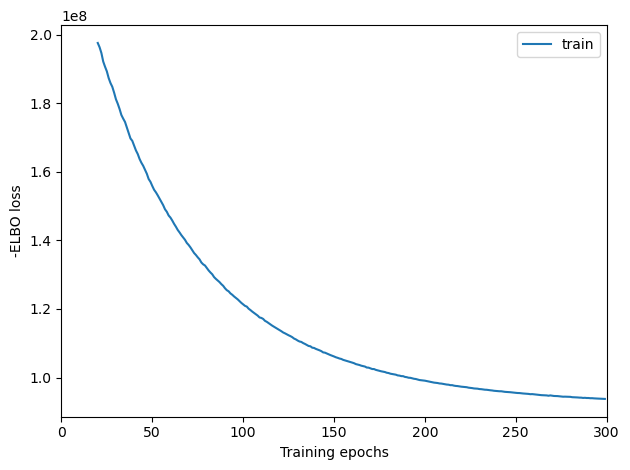

Sampling global variables, sample: 100%|██████████| 999/999 [00:08<00:00, 117.45it/s]


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Wed Feb  7 04:23:09 2024 Traing cell2location model
Epoch 5000/5000: 100%|██████████| 5000/5000 [11:17<00:00,  7.38it/s, v_num=1, elbo_train=2.96e+5]

`Trainer.fit` stopped: `max_epochs=5000` reached.


Epoch 5000/5000: 100%|██████████| 5000/5000 [11:17<00:00,  7.38it/s, v_num=1, elbo_train=2.96e+5]


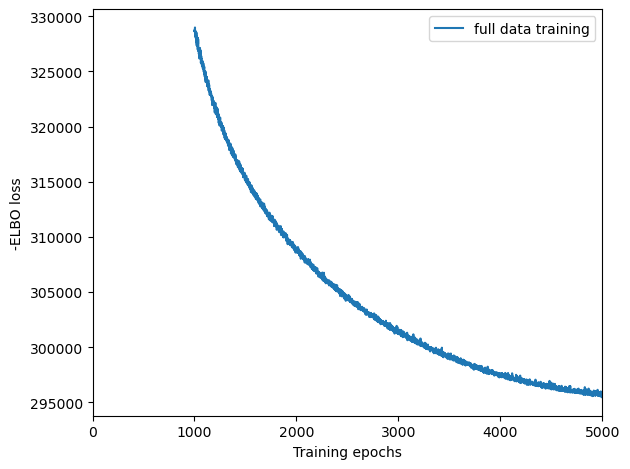

AnnData object with n_obs × n_vars = 72 × 1890
    obs: 'cell_count', '_indices', '_scvi_batch', '_scvi_labels'
    uns: 'density', '_scvi_uuid', '_scvi_manager_uuid'
    obsm: 'spatial'
Sampling global variables, sample: 100%|██████████| 999/999 [00:16<00:00, 58.90it/s]
Drop celltype [] contain less 2 sample


INFO:root:1890 training genes are saved in `uns``training_genes` of both single cell and spatial Anndatas.
INFO:root:9684 overlapped genes are saved in `uns``overlap_genes` of both single cell and spatial Anndatas.
INFO:root:uniform based density prior is calculated and saved in `obs``uniform_density` of the spatial Anndata.
INFO:root:rna count based density prior is calculated and saved in `obs``rna_count_based_density` of the spatial Anndata.
INFO:root:Allocate tensors for mapping.
INFO:root:Begin training with 1890 genes and rna_count_based density_prior in clusters mode...
INFO:root:Printing scores every 100 epochs.


Score: 0.644, KL reg: 0.321
Score: 0.890, KL reg: 0.000
Score: 0.890, KL reg: 0.000
Score: 0.890, KL reg: 0.000
Score: 0.890, KL reg: 0.000
Score: 0.890, KL reg: 0.000
Score: 0.890, KL reg: 0.000
Score: 0.890, KL reg: 0.000
Score: 0.890, KL reg: 0.000
Score: 0.890, KL reg: 0.000


INFO:root:Saving results..
INFO:root:spatial prediction dataframe is saved in `obsm` `tangram_ct_pred` of the spatial AnnData.


Wed Feb  7 04:35:42 2024 Dataset10 rank_genes_group+moranI
Wed Feb  7 04:36:02 2024 Reading data and perform basic filtering.
Wed Feb  7 04:36:02 2024 Traing regression model


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Epoch 300/300: 100%|██████████| 300/300 [01:27<00:00,  3.49it/s, v_num=1, elbo_train=2.19e+7]

`Trainer.fit` stopped: `max_epochs=300` reached.


Epoch 300/300: 100%|██████████| 300/300 [01:27<00:00,  3.42it/s, v_num=1, elbo_train=2.19e+7]


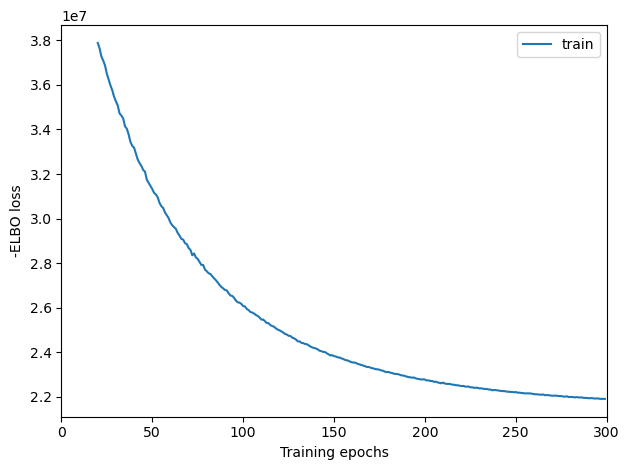

Sampling global variables, sample: 100%|██████████| 999/999 [00:07<00:00, 127.42it/s]
Wed Feb  7 04:37:38 2024 Traing cell2location model


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Epoch 3688/5000:  74%|███████▍  | 3688/5000 [08:28<03:00,  7.26it/s, v_num=1, elbo_train=1.32e+5]
Monitored metric elbo_train did not improve in the last 100 records. Best score: 131274.172. Signaling Trainer to stop.


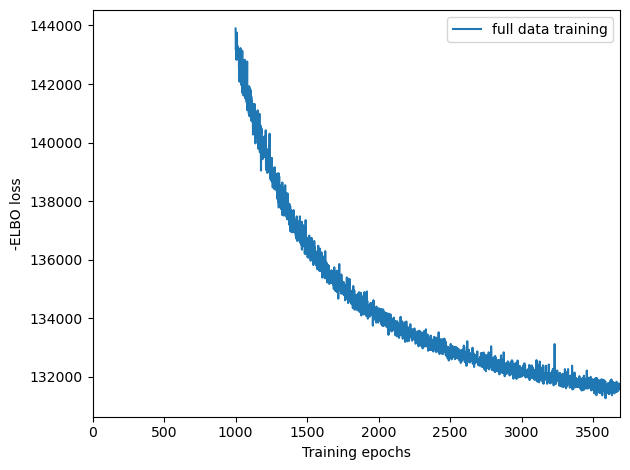

AnnData object with n_obs × n_vars = 189 × 324
    obs: 'cell_count', '_indices', '_scvi_batch', '_scvi_labels'
    uns: 'density', '_scvi_uuid', '_scvi_manager_uuid'
    obsm: 'spatial'
Sampling global variables, sample: 100%|██████████| 999/999 [00:17<00:00, 56.36it/s]
Drop celltype [] contain less 2 sample


INFO:root:324 training genes are saved in `uns``training_genes` of both single cell and spatial Anndatas.
INFO:root:882 overlapped genes are saved in `uns``overlap_genes` of both single cell and spatial Anndatas.
INFO:root:uniform based density prior is calculated and saved in `obs``uniform_density` of the spatial Anndata.
INFO:root:rna count based density prior is calculated and saved in `obs``rna_count_based_density` of the spatial Anndata.
INFO:root:Allocate tensors for mapping.
INFO:root:Begin training with 324 genes and rna_count_based density_prior in clusters mode...
INFO:root:Printing scores every 100 epochs.


Score: 0.591, KL reg: 0.219
Score: 0.818, KL reg: 0.001
Score: 0.819, KL reg: 0.001
Score: 0.819, KL reg: 0.001
Score: 0.819, KL reg: 0.001
Score: 0.820, KL reg: 0.001
Score: 0.820, KL reg: 0.001
Score: 0.820, KL reg: 0.001
Score: 0.820, KL reg: 0.001
Score: 0.820, KL reg: 0.001


INFO:root:Saving results..
INFO:root:spatial prediction dataframe is saved in `obsm` `tangram_ct_pred` of the spatial AnnData.


Wed Feb  7 04:47:45 2024 Dataset10 rank_genes_group+spatialDE


INFO:root:Performing DE test
INFO:root:Pre-calculating USU^T = K's ...
INFO:root:Done: 0.079s
INFO:root:Fitting gene models


Models:   0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/882 [00:00<?, ?it/s]

  0%|          | 0/882 [00:00<?, ?it/s]

  0%|          | 0/882 [00:00<?, ?it/s]

  0%|          | 0/882 [00:00<?, ?it/s]

  0%|          | 0/882 [00:00<?, ?it/s]

  0%|          | 0/882 [00:00<?, ?it/s]

  0%|          | 0/882 [00:00<?, ?it/s]

  0%|          | 0/882 [00:00<?, ?it/s]

  0%|          | 0/882 [00:00<?, ?it/s]

  0%|          | 0/882 [00:00<?, ?it/s]

INFO:root:Finished fitting 10 models to 882 genes


Wed Feb  7 04:48:37 2024 Reading data and perform basic filtering.
Wed Feb  7 04:48:37 2024 Traing regression model


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Epoch 300/300: 100%|██████████| 300/300 [01:25<00:00,  3.50it/s, v_num=1, elbo_train=2.1e+7] 

`Trainer.fit` stopped: `max_epochs=300` reached.


Epoch 300/300: 100%|██████████| 300/300 [01:25<00:00,  3.50it/s, v_num=1, elbo_train=2.1e+7]


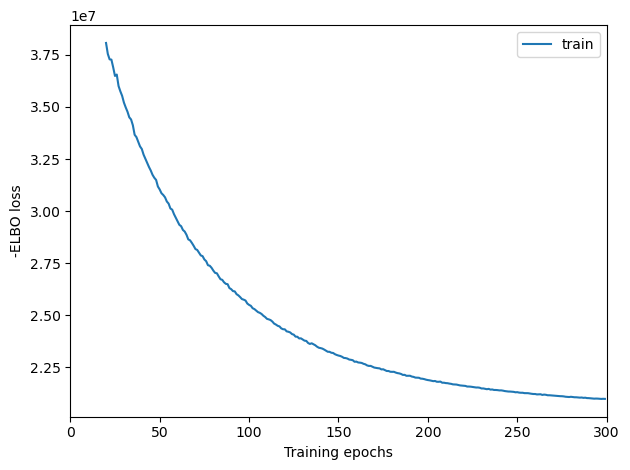

Sampling global variables, sample: 100%|██████████| 999/999 [00:08<00:00, 122.70it/s]


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Wed Feb  7 04:50:12 2024 Traing cell2location model
Epoch 3371/5000:  67%|██████▋   | 3371/5000 [07:22<03:33,  7.62it/s, v_num=1, elbo_train=1.32e+5]
Monitored metric elbo_train did not improve in the last 100 records. Best score: 131702.500. Signaling Trainer to stop.


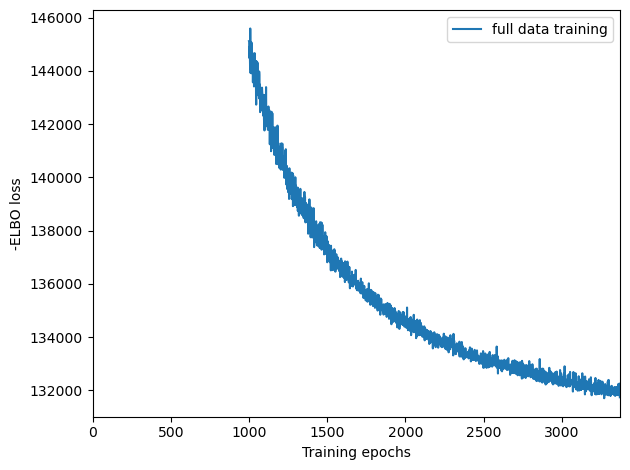

AnnData object with n_obs × n_vars = 189 × 325
    obs: 'cell_count', '_indices', '_scvi_batch', '_scvi_labels'
    uns: 'density', '_scvi_uuid', '_scvi_manager_uuid'
    obsm: 'spatial'
Sampling global variables, sample: 100%|██████████| 999/999 [00:18<00:00, 55.35it/s]
Drop celltype [] contain less 2 sample


INFO:root:325 training genes are saved in `uns``training_genes` of both single cell and spatial Anndatas.
INFO:root:882 overlapped genes are saved in `uns``overlap_genes` of both single cell and spatial Anndatas.
INFO:root:uniform based density prior is calculated and saved in `obs``uniform_density` of the spatial Anndata.
INFO:root:rna count based density prior is calculated and saved in `obs``rna_count_based_density` of the spatial Anndata.
INFO:root:Allocate tensors for mapping.
INFO:root:Begin training with 325 genes and rna_count_based density_prior in clusters mode...
INFO:root:Printing scores every 100 epochs.


Score: 0.568, KL reg: 0.204
Score: 0.810, KL reg: 0.001
Score: 0.811, KL reg: 0.001
Score: 0.811, KL reg: 0.001
Score: 0.811, KL reg: 0.001
Score: 0.811, KL reg: 0.001
Score: 0.812, KL reg: 0.001
Score: 0.812, KL reg: 0.001
Score: 0.812, KL reg: 0.001
Score: 0.812, KL reg: 0.001


INFO:root:Saving results..
INFO:root:spatial prediction dataframe is saved in `obsm` `tangram_ct_pred` of the spatial AnnData.


In [3]:
for dsID, n_genes in zip(['Dataset4','Dataset10'], [1000, 200]):
    RNA_h5ad = f'./{dsID}/{dsID}_sc.h5ad'
    Spatial_h5ad = f'{dsID}/{dsID}_Simulated_sp.h5ad'
    celltype_key = 'celltype'
    
    methods = ['rank_genes_group+moranI', 'rank_genes_group+spatialDE', ]
    
    # methods = ['spanve','rank_genes_group',#'seurat_v3', 'all_genes'
    #            'cell_ranger',
    #            'rank_genes_group+spanve',#'seurat_v3+spanve',
    #            'cell_ranger+spanve',
    #           'moranI', 'spatialDE', 'cell_ranger+moranI', 'cell_ranger+spatialDE'
    #           ]
    
    for i in methods:
        printv(dsID, i)
        
        output_path = os.path.join(dsID,'output',i)
        cell2loc_res_saving = os.path.join(output_path, 'Cell2location_result.csv')
        tangram_res_saving = os.path.join(output_path, 'Tangram_result.csv')
        
        # if os.path.exists(cell2loc_res_saving) and os.path.exists(tangram_res_saving):
        #     continue
        
        stdata = sc.read_h5ad(Spatial_h5ad)
        scdata_raw = sc.read_h5ad(RNA_h5ad)
        GS = GeneSelector(stdata.copy(), scdata_raw.copy(), n_genes, celltype_key)
        
        if not os.path.exists(output_path):
            os.mkdir(output_path)
        
        if i == 'all_genes':
            selected = list(GS.valid_genes)
        elif '+' in i:
            ms = i.split('+')
            selected = GS.fit(ms)
        else:
            selected = GS.fit(i)
        
        assert (len(selected) == n_genes) | (i == 'all_genes') | ('+' in i)
                                           
        # if not os.path.exists(cell2loc_res_saving):
        _, decov_res = run_cell2location(scdata_raw.copy(), stdata, celltype_key, selected)
        decov_res.to_csv(cell2loc_res_saving)
        # if not os.path.exists(tangram_res_saving):
        run_tangram(scdata_raw, stdata, celltype_key, selected).to_csv(tangram_res_saving)

In [3]:
for dsID, n_genes in zip(['Dataset4','Dataset10'], [1000, 200]):
    
    RNA_h5ad = f'./{dsID}/{dsID}_sc.h5ad'
    Spatial_h5ad = f'{dsID}/{dsID}_Simulated_sp.h5ad'
    celltype_key = 'celltype'
    
    methods = ['rank_genes_group+moranI', 'rank_genes_group+spatialDE', ]
    
    # methods = ['spanve','rank_genes_group',#'seurat_v3', 'all_genes'
    #            'cell_ranger',
    #            'rank_genes_group+spanve',#'seurat_v3+spanve',
    #            'cell_ranger+spanve',
    #           'moranI', 'spatialDE', 'cell_ranger+moranI', 'cell_ranger+spatialDE'
    #           ]
    
    for i in methods:
        printv(dsID, i)
        
        output_path = os.path.join(dsID,'output',i)
        bayestme_res_saving = os.path.join(output_path, 'Bayestme_result.csv')
        
        # if os.path.exists(bayestme_res_saving):
        #     continue
        
        stdata = sc.read_h5ad(Spatial_h5ad)
        scdata_raw = sc.read_h5ad(RNA_h5ad)
        GS = GeneSelector(stdata.copy(), scdata_raw.copy(), n_genes, celltype_key)
        
        if not os.path.exists(output_path):
            os.mkdir(output_path)
        
        if i == 'all_genes':
            selected = list(GS.valid_genes)
        elif '+' in i:
            ms = i.split('+')
            selected = GS.fit(ms)
        else:
            selected = GS.fit(i)
        assert (len(selected) == n_genes) | (i == 'all_genes') | ('+' in i)                       
        run_bayestme(stdata[:,selected].copy(), scdata_raw[:, selected].copy(), celltype_key, n_neighbors=4).to_csv(bayestme_res_saving)

Wed Feb  7 05:05:56 2024 Dataset4 rank_genes_group+moranI
❗ You are running 3.11.7
Only python versions 3.7~3.10 are currently tested, use at your own risk.


/share/anaconda3/envs/bayestme/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Deconvolution: 100%|██████████| 1500/1500 [03:32<00:00,  7.05it/s]


Wed Feb  7 05:10:38 2024 Dataset4 rank_genes_group+spatialDE


Models: 100%|██████████| 10/10 [00:20<00:00,  2.07s/it]
/share/anaconda3/envs/bayestme/lib/python3.11/site-packages/SpatialDE/base.py:310: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  model_results = model_results[model_results.groupby(['g'])['max_ll'].transform(max) == model_results['max_ll']]
Deconvolution: 100%|██████████| 1500/1500 [03:48<00:00,  6.56it/s]


Wed Feb  7 05:15:49 2024 Dataset10 rank_genes_group+moranI


Deconvolution: 100%|██████████| 1500/1500 [04:10<00:00,  5.99it/s]


Wed Feb  7 05:20:21 2024 Dataset10 rank_genes_group+spatialDE


Models: 100%|██████████| 10/10 [00:26<00:00,  2.60s/it]
/share/anaconda3/envs/bayestme/lib/python3.11/site-packages/SpatialDE/base.py:310: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  model_results = model_results[model_results.groupby(['g'])['max_ll'].transform(max) == model_results['max_ll']]
Deconvolution: 100%|██████████| 1500/1500 [04:07<00:00,  6.05it/s]


# read results

## Dataset10

/share/anaconda3/envs/bayestme/lib/python3.11/site-packages/scipy/stats/_stats_py.py:4781: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/share/home/biopharm/Caiguoxin/projects/SpaBench/deconve/spatial_decov_metrics.py:16: RuntimeWarning: invalid value encountered in divide
  im1, im2 = im1 / im1.max(), im2 / im2.max()
/share/anaconda3/envs/bayestme/lib/python3.11/site-packages/scipy/spatial/distance.py:1249: RuntimeWarning: invalid value encountered in divide
  p = p / np.sum(p, axis=axis, keepdims=True)


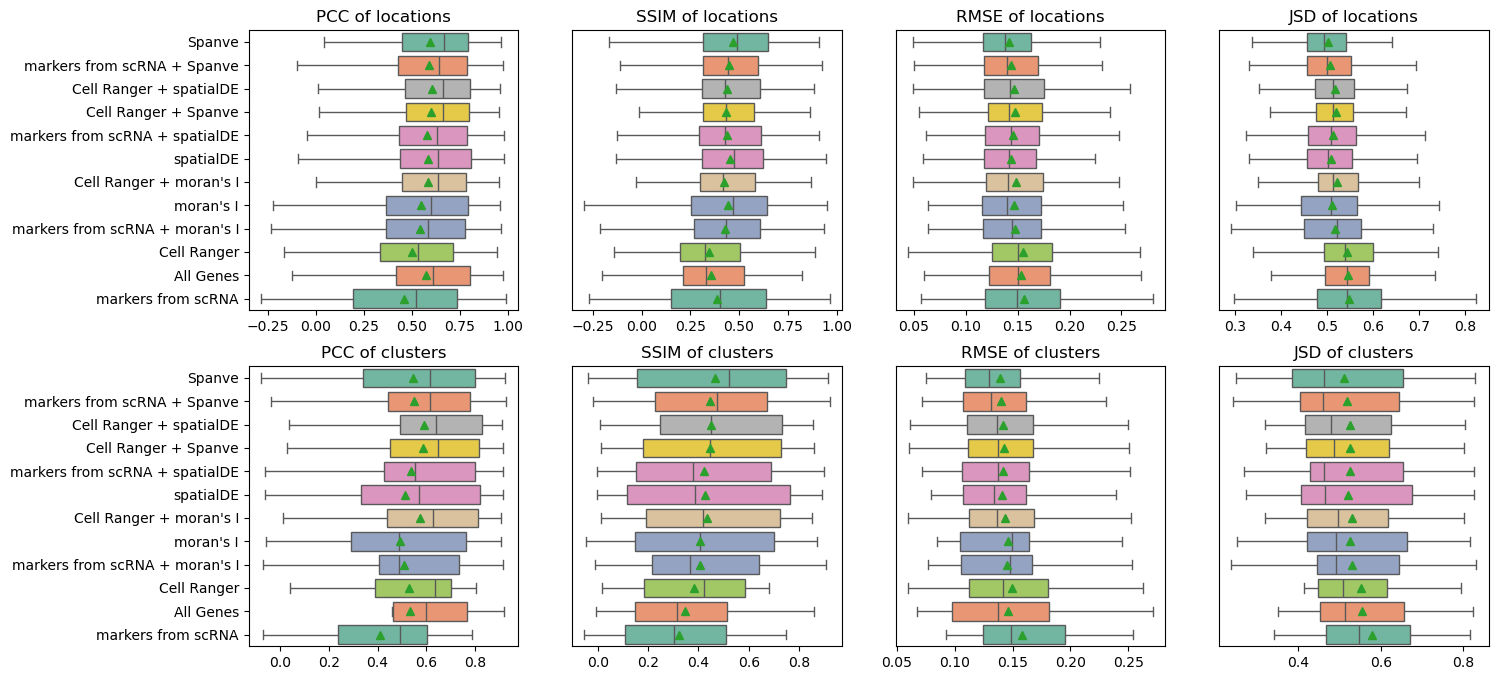

/share/anaconda3/envs/bayestme/lib/python3.11/site-packages/scipy/stats/_stats_py.py:4781: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/share/home/biopharm/Caiguoxin/projects/SpaBench/deconve/spatial_decov_metrics.py:16: RuntimeWarning: invalid value encountered in divide
  im1, im2 = im1 / im1.max(), im2 / im2.max()
/share/anaconda3/envs/bayestme/lib/python3.11/site-packages/scipy/spatial/distance.py:1249: RuntimeWarning: invalid value encountered in divide
  p = p / np.sum(p, axis=axis, keepdims=True)


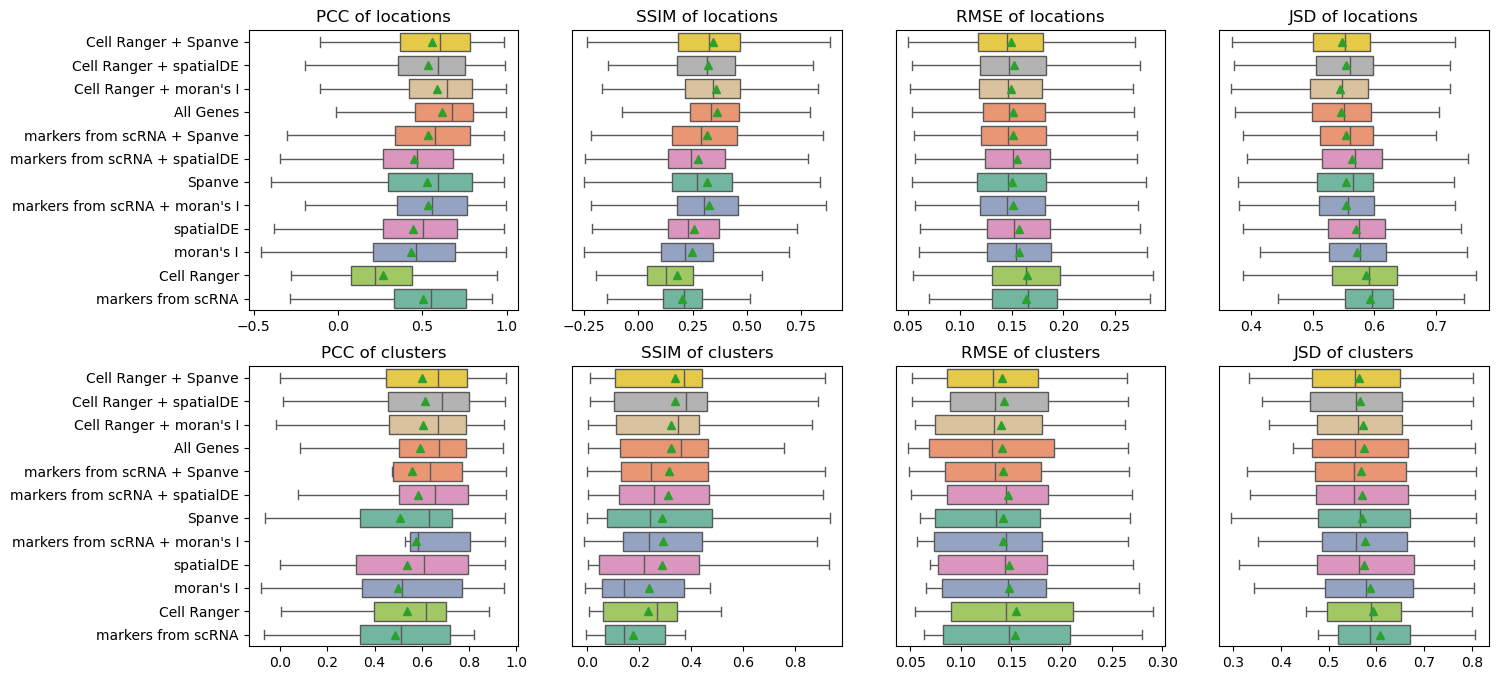

/share/anaconda3/envs/bayestme/lib/python3.11/site-packages/scipy/stats/_stats_py.py:4781: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/share/home/biopharm/Caiguoxin/projects/SpaBench/deconve/spatial_decov_metrics.py:16: RuntimeWarning: invalid value encountered in divide
  im1, im2 = im1 / im1.max(), im2 / im2.max()
/share/anaconda3/envs/bayestme/lib/python3.11/site-packages/scipy/spatial/distance.py:1249: RuntimeWarning: invalid value encountered in divide
  p = p / np.sum(p, axis=axis, keepdims=True)
/share/anaconda3/envs/bayestme/lib/python3.11/site-packages/scipy/spatial/distance.py:1250: RuntimeWarning: invalid value encountered in divide
  q = q / np.sum(q, axis=axis, keepdims=True)


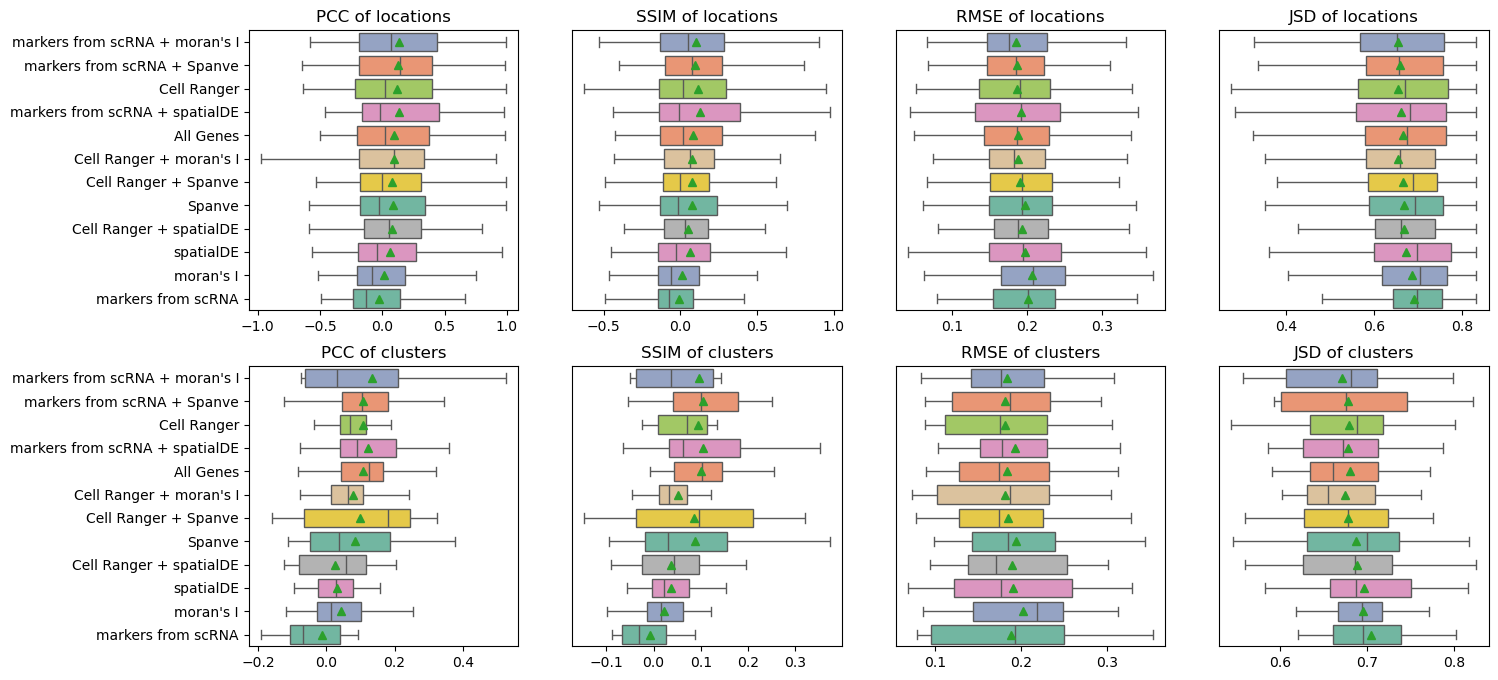

In [1]:
from spatial_decov_metrics import *

methods = ['spanve','all_genes','moranI', 'spatialDE', #'seurat_v3', 'seurat_v3+spanve',
           'cell_ranger','cell_ranger+spanve','cell_ranger+moranI', 'cell_ranger+spatialDE',
           'rank_genes_group', 'rank_genes_group+spanve',  'rank_genes_group+moranI', 'rank_genes_group+spatialDE',
          ]

name_mapper = {
    'all_genes': 'All Genes',
    'spanve': 'Spanve',
    'moranI': r"moran's I",
    'cell_ranger': 'Cell Ranger',
    '+': ' + ',
    'rank_genes_group': 'markers from scRNA',
}

def change_name(s):
    s_ = s
    for k,v in name_mapper.items():
        if k in s_:
            s_ = s_.replace(k, v)
    return s_

tangram_dict = dict()
cell2loc_dict = dict()
bayestme_dict = dict()
for method in methods:
    tangram_results = pd.read_csv('Dataset10/output/{}/Tangram_result.csv'.format(method),index_col=0)
    tangram_results = tangram_results.loc[:,np.unique(tangram_results.columns)]
    tangram_results = (tangram_results.T/tangram_results.sum(axis=1)).T
    tangram_results = tangram_results.fillna(0)
    tangram_results = tangram_results.drop(columns=['Other','Neuron Other','Inhibitory Other'])
    tangram_dict[method] = tangram_results.copy(deep=True)

    cell2loc_results = pd.read_csv('Dataset10/output/{}/Cell2location_result.csv'.format(method),index_col=0)
    cell2loc_results.index = np.arange(len(cell2loc_results))
    cell2loc_results.columns = [c.split('q05cell_abundance_w_sf_')[1] for c in cell2loc_results.columns]
    cell2loc_results = cell2loc_results.loc[:,np.unique(cell2loc_results.columns)]
    cell2loc_results = (cell2loc_results.T/cell2loc_results.sum(axis=1)).T
    cell2loc_results = cell2loc_results.fillna(0)
    cell2loc_results = cell2loc_results.drop(columns=['Other','Neuron Other','Inhibitory Other'])
    cell2loc_dict[method] = cell2loc_results.copy(deep=True)
    
    bayestme_results = pd.read_csv('Dataset10/output/{}/Bayestme_result.csv'.format(method),index_col=0)
    bayestme_results = bayestme_results.loc[:,np.unique(bayestme_results.columns)]
    bayestme_results = (bayestme_results.T/bayestme_results.sum(axis=1)).T
    bayestme_results = bayestme_results.fillna(0)
    bayestme_results = bayestme_results.drop(columns=['Other','Neuron Other','Inhibitory Other'])
    bayestme_dict[method] = bayestme_results.copy(deep=True)

tangram_dict = {change_name(k):v for k,v in tangram_dict.items()}
cell2loc_dict = {change_name(k):v for k,v in cell2loc_dict.items()}
bayestme_dict = {change_name(k):v for k,v in bayestme_dict.items()}

gd_results = pd.read_table('Dataset10/Simulated/combined_spot_clusters.txt', sep = '\t', header = 0, index_col = 0)
gd_results.columns = ['Astro', 'Endo', 'Excitatory L2/3', 'Excitatory L4', 'Excitatory L5', 'Excitatory L6', 'HPC', 'Micro', 'Npy'
                     , 'Olig', 'Other', 'Inhibitory Pvalb', 'Smc', 'Inhibitory Sst', 'Inhibitory Vip']
gd_results = (gd_results.T/gd_results.sum(axis=1)).T
gd_results = gd_results.drop(columns=['Other','Npy', 'HPC'])
gd_results = gd_results.loc[:,np.unique(gd_results.columns)]
gd_results = gd_results.fillna(0)
gd_loc = pd.read_csv('Dataset10/Simulated/combined_Locations.txt',sep='\t')

make_score(gd_results, tangram_dict, './Dataset10/metrics/tangram')
make_score(gd_results, cell2loc_dict, './Dataset10/metrics/cell2loc')
make_score(gd_results, bayestme_dict, './Dataset10/metrics/bayestme')

## Dataset 4

/share/anaconda3/envs/bayestme/lib/python3.11/site-packages/scipy/stats/_stats_py.py:4781: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/share/home/biopharm/Caiguoxin/projects/SpaBench/deconve/spatial_decov_metrics.py:16: RuntimeWarning: invalid value encountered in divide
  im1, im2 = im1 / im1.max(), im2 / im2.max()
/share/anaconda3/envs/bayestme/lib/python3.11/site-packages/scipy/spatial/distance.py:1249: RuntimeWarning: invalid value encountered in divide
  p = p / np.sum(p, axis=axis, keepdims=True)


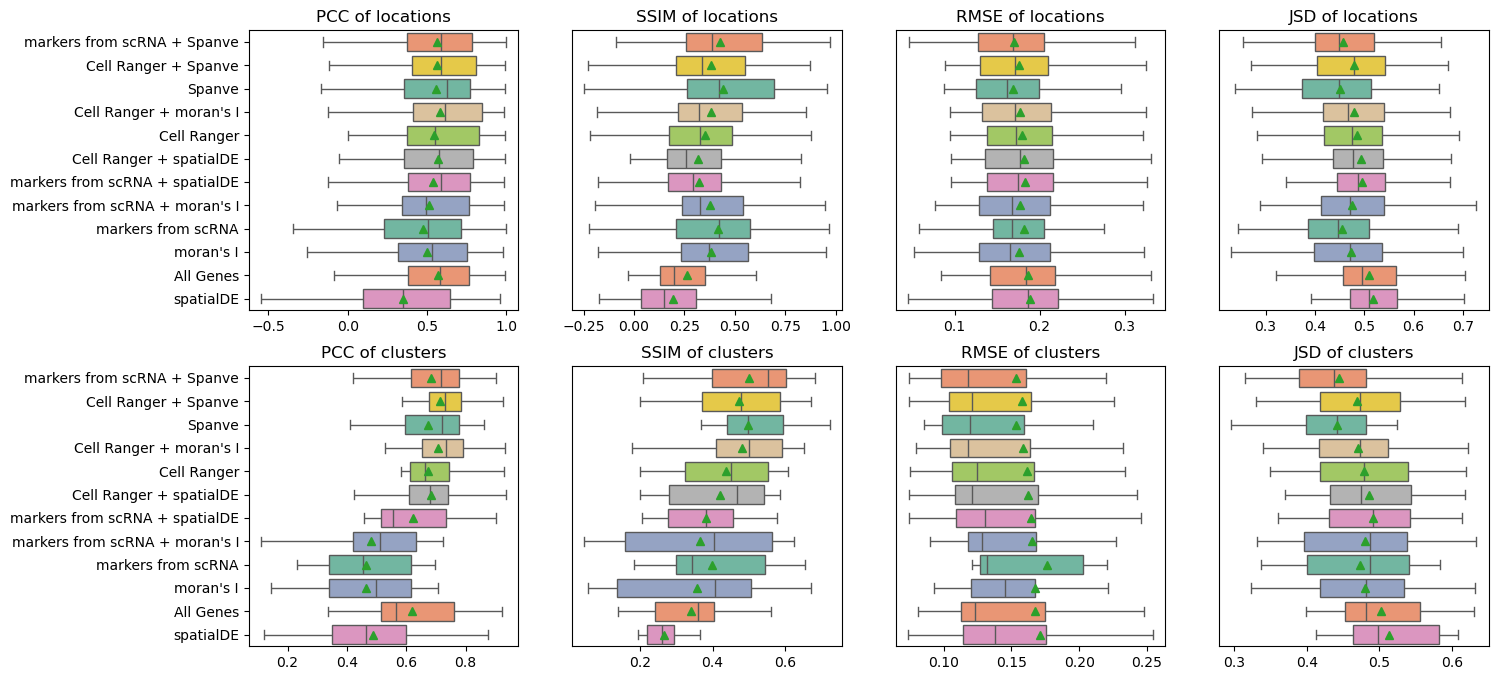

/share/anaconda3/envs/bayestme/lib/python3.11/site-packages/scipy/stats/_stats_py.py:4781: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/share/home/biopharm/Caiguoxin/projects/SpaBench/deconve/spatial_decov_metrics.py:16: RuntimeWarning: invalid value encountered in divide
  im1, im2 = im1 / im1.max(), im2 / im2.max()
/share/anaconda3/envs/bayestme/lib/python3.11/site-packages/scipy/spatial/distance.py:1249: RuntimeWarning: invalid value encountered in divide
  p = p / np.sum(p, axis=axis, keepdims=True)


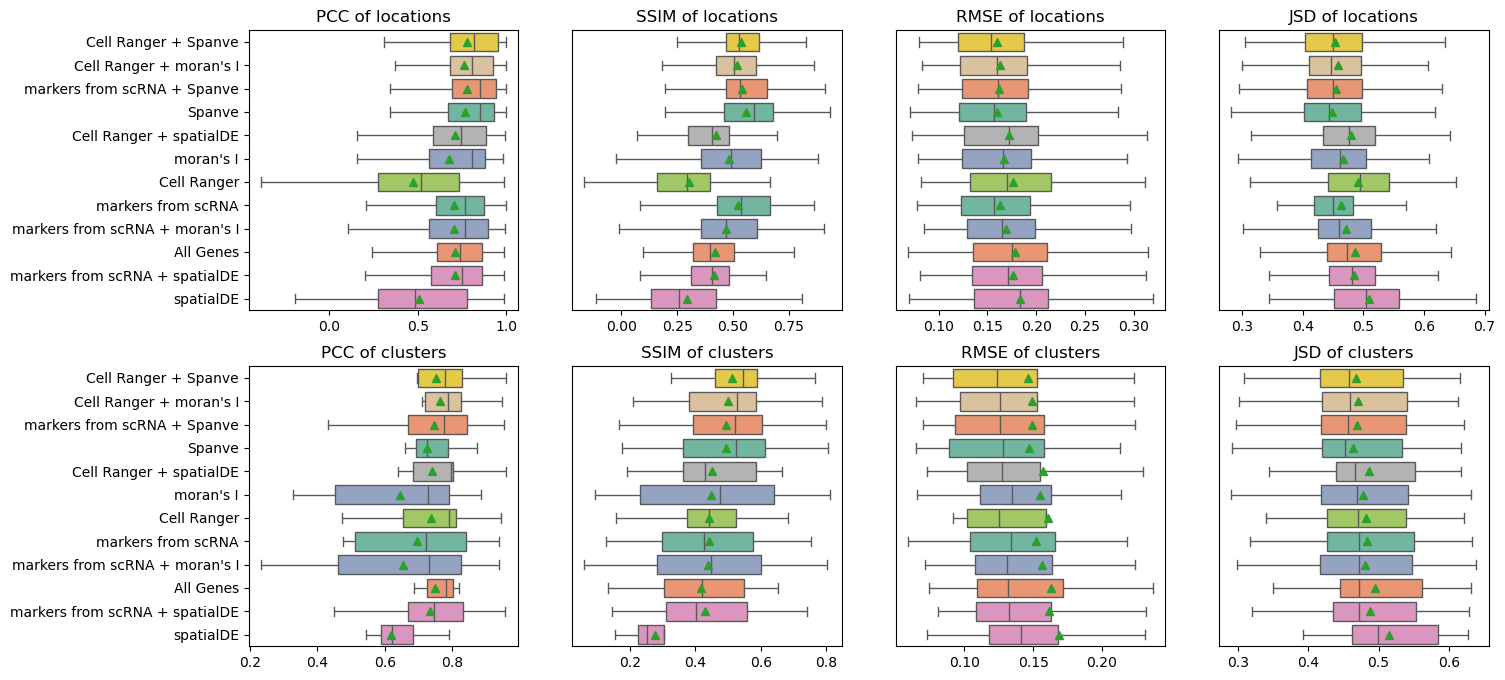

/share/anaconda3/envs/bayestme/lib/python3.11/site-packages/scipy/stats/_stats_py.py:4781: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/share/home/biopharm/Caiguoxin/projects/SpaBench/deconve/spatial_decov_metrics.py:16: RuntimeWarning: invalid value encountered in divide
  im1, im2 = im1 / im1.max(), im2 / im2.max()
/share/anaconda3/envs/bayestme/lib/python3.11/site-packages/scipy/spatial/distance.py:1249: RuntimeWarning: invalid value encountered in divide
  p = p / np.sum(p, axis=axis, keepdims=True)
/share/anaconda3/envs/bayestme/lib/python3.11/site-packages/scipy/spatial/distance.py:1250: RuntimeWarning: invalid value encountered in divide
  q = q / np.sum(q, axis=axis, keepdims=True)


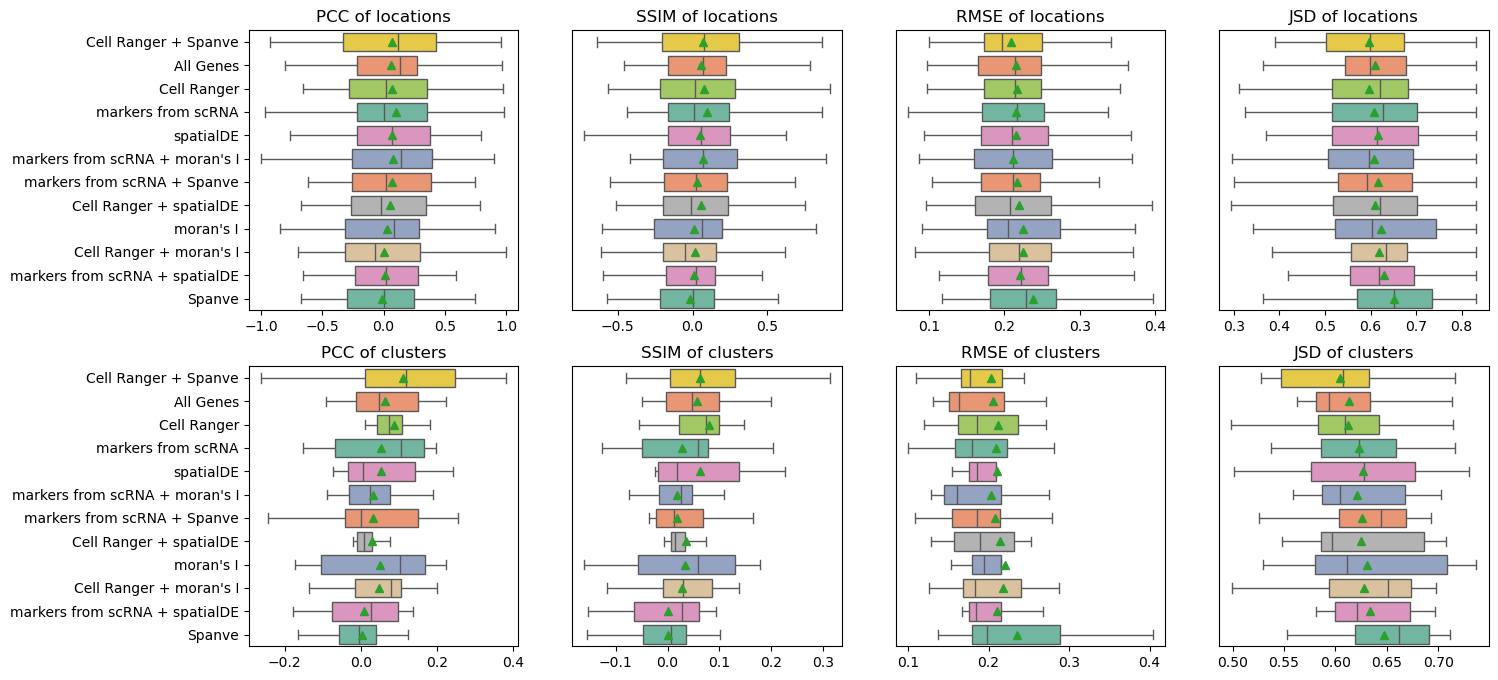

In [2]:
from spatial_decov_metrics import *

methods = ['spanve','all_genes','moranI', 'spatialDE', #'seurat_v3', 'seurat_v3+spanve',
           'cell_ranger','cell_ranger+spanve','cell_ranger+moranI', 'cell_ranger+spatialDE',
           'rank_genes_group', 'rank_genes_group+spanve',  'rank_genes_group+moranI', 'rank_genes_group+spatialDE',
          ]

tangram_dict = dict()
cell2loc_dict = dict()
bayestme_dict = dict()

for method in methods:
    tangram_results = pd.read_csv('Dataset4/output/{}/Tangram_result.csv'.format(method),index_col=0)
    tangram_results = tangram_results.loc[:,np.unique(tangram_results.columns)]
    tangram_results = (tangram_results.T/tangram_results.sum(axis=1)).T
    tangram_results = tangram_results.fillna(0)
    tangram_results = tangram_results.drop(columns=['CR', 'Peri', 'Smc', 'VLMC'])
    tangram_dict[method] = tangram_results.copy(deep=True)

    cell2loc_results = pd.read_csv('Dataset4/output/{}/Cell2location_result.csv'.format(method),index_col=0)
    cell2loc_results.index = np.arange(len(cell2loc_results))
    cell2loc_results.columns = [c.split('q05cell_abundance_w_sf_')[1] for c in cell2loc_results.columns]
    cell2loc_results = cell2loc_results.loc[:,np.unique(cell2loc_results.columns)]
    cell2loc_results = (cell2loc_results.T/cell2loc_results.sum(axis=1)).T
    cell2loc_results = cell2loc_results.fillna(0)
    cell2loc_results = cell2loc_results.drop(columns=['CR', 'Peri', 'Smc', 'VLMC'])
    cell2loc_dict[method] = cell2loc_results.copy(deep=True)
    
    bayestme_results = pd.read_csv('Dataset4/output/{}/Bayestme_result.csv'.format(method),index_col=0)
    bayestme_results = bayestme_results.loc[:,np.unique(bayestme_results.columns)]
    bayestme_results = (bayestme_results.T/bayestme_results.sum(axis=1)).T
    bayestme_results = bayestme_results.fillna(0)
    bayestme_results = bayestme_results.drop(columns=['CR', 'Peri', 'Smc', 'VLMC'])
    bayestme_dict[method] = bayestme_results.copy(deep=True)

tangram_dict = {change_name(k):v for k,v in tangram_dict.items()}
cell2loc_dict = {change_name(k):v for k,v in cell2loc_dict.items()}
bayestme_dict = {change_name(k):v for k,v in bayestme_dict.items()}

gd_results = pd.read_table('Dataset4/Simulated_seqFISH/combined_spot_clusters.txt', sep = '\t', header = 0, index_col = 0)
gd_results = (gd_results.T/gd_results.sum(axis=1)).T
gd_results = gd_results.drop(columns=['Ependymal', 'NSC', 'Neuroblast', 'Non-known', 'OPC'])
gd_results = gd_results.loc[:,np.unique(gd_results.columns)]
gd_results = gd_results.fillna(0)
gd_loc = pd.read_csv('Dataset4/Simulated_seqFISH/combined_Locations.txt',sep='\t')

make_score(gd_results, tangram_dict, './Dataset4/metrics/tangram')
make_score(gd_results, cell2loc_dict, './Dataset4/metrics/cell2loc')
make_score(gd_results, bayestme_dict, './Dataset4/metrics/bayestme')